In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
column = len(list(df))
column

6

In [18]:
np.unique(df["Species"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

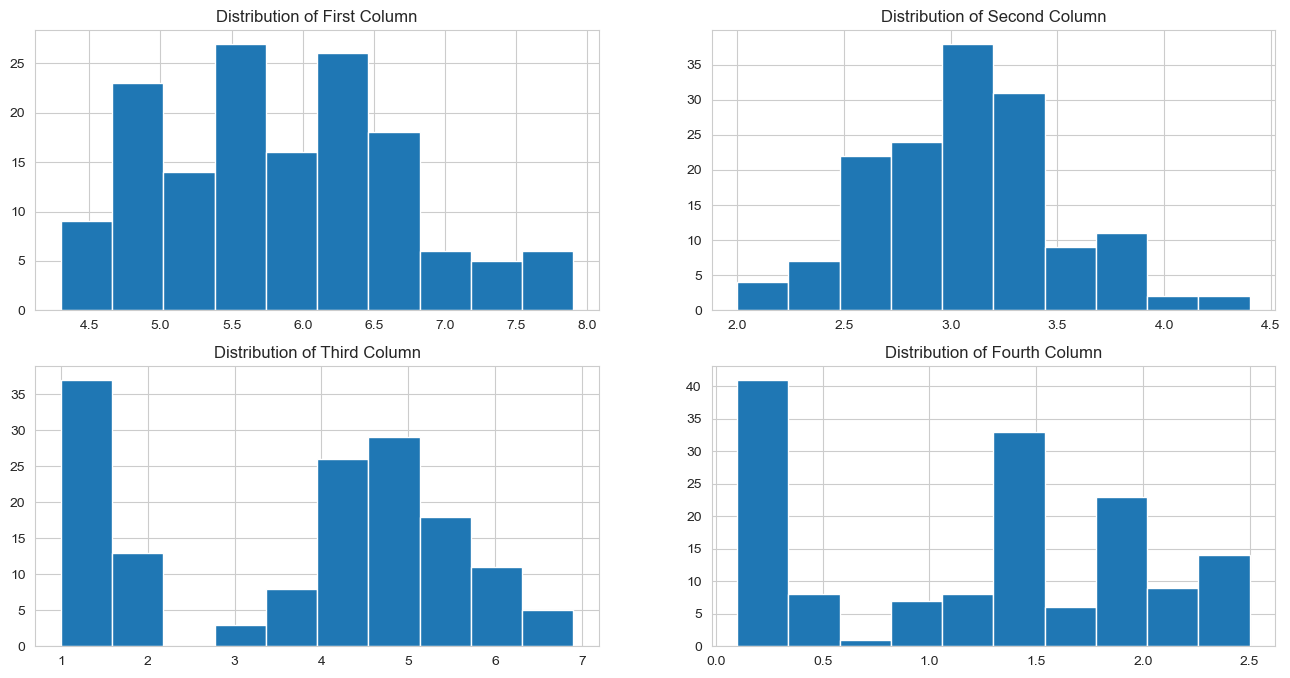

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))


axes[0,0].set_title("Distribution of First Column")
axes[0,0].hist(df["SepalLengthCm"]);

axes[0,1].set_title("Distribution of Second Column")
axes[0,1].hist(df["SepalWidthCm"]);

axes[1,0].set_title("Distribution of Third Column")
axes[1,0].hist(df["PetalLengthCm"]);

axes[1,1].set_title("Distribution of Fourth Column")
axes[1,1].hist(df["PetalWidthCm"]);

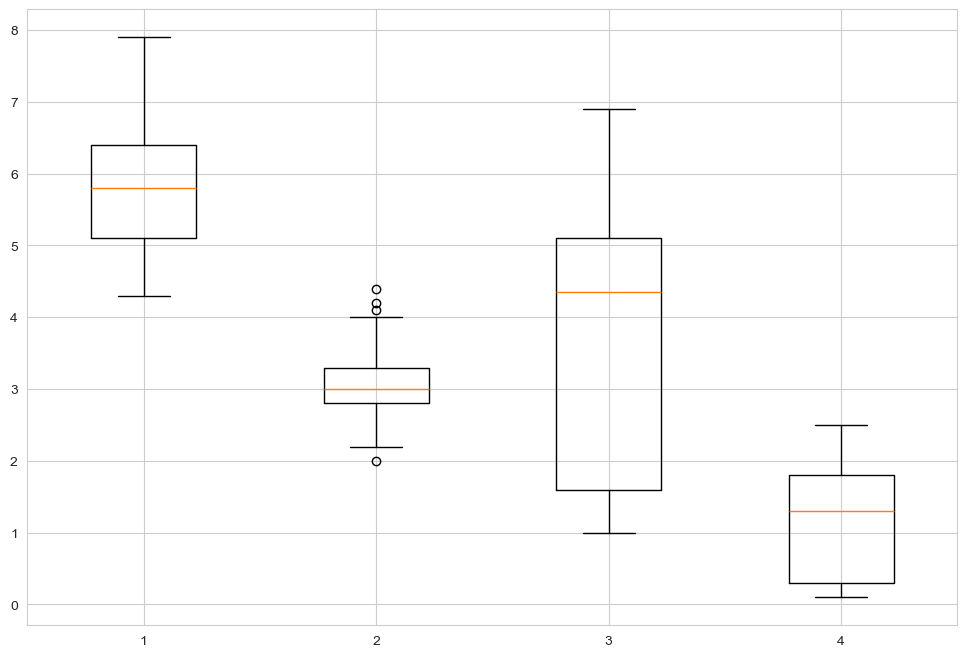

In [22]:
data_to_plot = [df["SepalLengthCm"],df["SepalWidthCm"],df["PetalLengthCm"],df["PetalWidthCm"]]

sns.set_style("whitegrid")
# Creating a figure instance
fig = plt.figure(1, figsize=(12,8))

# Creating an axes instance
ax = fig.add_subplot(111)

# Creating the boxplot
bp = ax.boxplot(data_to_plot);

Old Shape:  (146, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

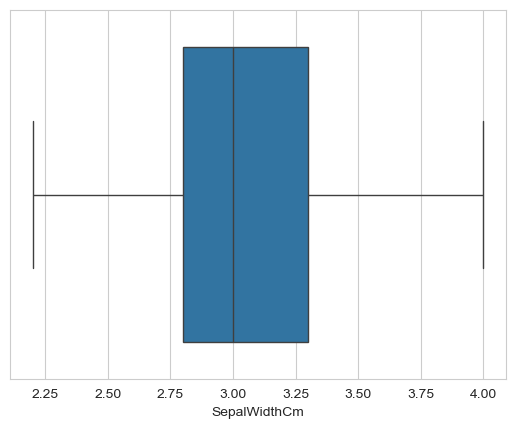

In [28]:
#Removing Outlier 
Q1 = np.percentile(df['SepalWidthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)
